# Google Data Analytics Course Capstone Project
## Case Study 1: Cyclistic Bike Share

1. Import library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime as dt

2. Read all the xlsx files
3. Combine the file into one dataframe

In [2]:
data_01 = pd.read_csv('./data/202201-divvy-tripdata.csv')
data_02 = pd.read_csv('./data/202202-divvy-tripdata.csv')
data_03 = pd.read_csv('./data/202203-divvy-tripdata.csv')
data_04 = pd.read_csv('./data/202204-divvy-tripdata.csv')
data_05 = pd.read_csv('./data/202205-divvy-tripdata.csv')
data_06 = pd.read_csv('./data/202206-divvy-tripdata.csv')
data_07 = pd.read_csv('./data/202207-divvy-tripdata.csv')
data_08 = pd.read_csv('./data/202208-divvy-tripdata.csv')
data_09 = pd.read_csv('./data/202209-divvy-tripdata.csv')
data_10 = pd.read_csv('./data/202210-divvy-tripdata.csv')
data_11 = pd.read_csv('./data/202211-divvy-tripdata.csv')
data_12 = pd.read_csv('./data/202212-divvy-tripdata.csv')

all_trip = pd.concat([data_01, data_02, data_03, data_04, data_05, data_06, data_07, data_08, data_09, data_10, data_11, data_12])

print(all_trip.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5667717 entries, 0 to 181805
Data columns (total 13 columns):
 #   Column              Dtype  
---  ------              -----  
 0   ride_id             object 
 1   rideable_type       object 
 2   started_at          object 
 3   ended_at            object 
 4   start_station_name  object 
 5   start_station_id    object 
 6   end_station_name    object 
 7   end_station_id      object 
 8   start_lat           float64
 9   start_lng           float64
 10  end_lat             float64
 11  end_lng             float64
 12  member_casual       object 
dtypes: float64(4), object(9)
memory usage: 605.4+ MB
None


3. Remove columns that is not used in this analyst

In [3]:
all_trip_trimmed = all_trip.drop(columns=['start_lat', 'start_lng', 'end_lat', 'end_lng'])
all_trip_trimmed['started_at'] = pd.to_datetime(all_trip_trimmed['started_at'])
all_trip_trimmed['ended_at'] = pd.to_datetime(all_trip_trimmed['ended_at'])
all_trip_trimmed['ride_length'] = ((all_trip_trimmed['ended_at']-all_trip_trimmed['started_at']).dt.seconds)/60.0
all_trip_trimmed['weekday'] = all_trip_trimmed['started_at'].dt.day_of_week
all_trip_trimmed = all_trip_trimmed[all_trip_trimmed['ride_length']>= 5.0]
all_trip_trimmed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4560269 entries, 1 to 181805
Data columns (total 11 columns):
 #   Column              Dtype         
---  ------              -----         
 0   ride_id             object        
 1   rideable_type       object        
 2   started_at          datetime64[ns]
 3   ended_at            datetime64[ns]
 4   start_station_name  object        
 5   start_station_id    object        
 6   end_station_name    object        
 7   end_station_id      object        
 8   member_casual       object        
 9   ride_length         float64       
 10  weekday             int64         
dtypes: datetime64[ns](2), float64(1), int64(1), object(7)
memory usage: 417.5+ MB


Q1. How is the casual difference from member?
1. Ride type

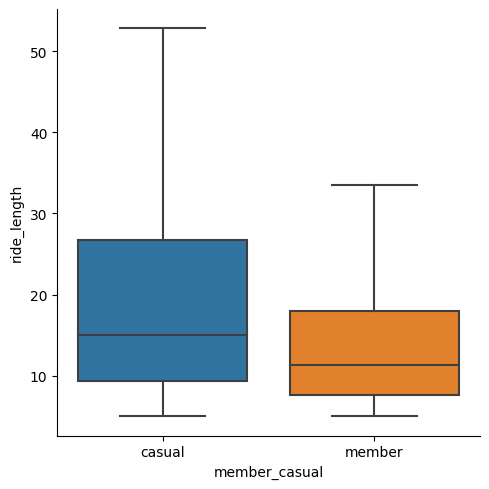

In [4]:
sns.catplot(data=all_trip_trimmed, x='member_casual', y='ride_length',kind = 'box', sym='')

<AxesSubplot: xlabel='weekday', ylabel='count'>

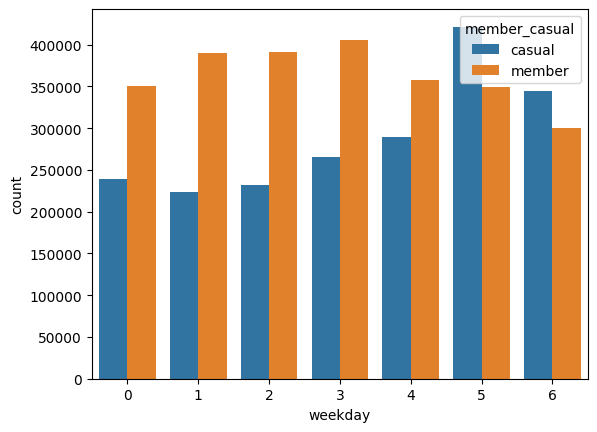

In [5]:
sns.countplot(data=all_trip_trimmed, x='weekday', hue='member_casual', dodge=True)

<AxesSubplot: xlabel='rideable_type', ylabel='count'>

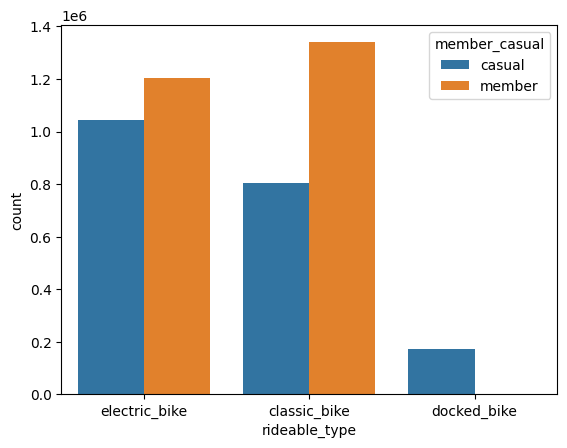

In [6]:
sns.countplot(data=all_trip_trimmed, x='rideable_type', hue='member_casual', dodge=True)

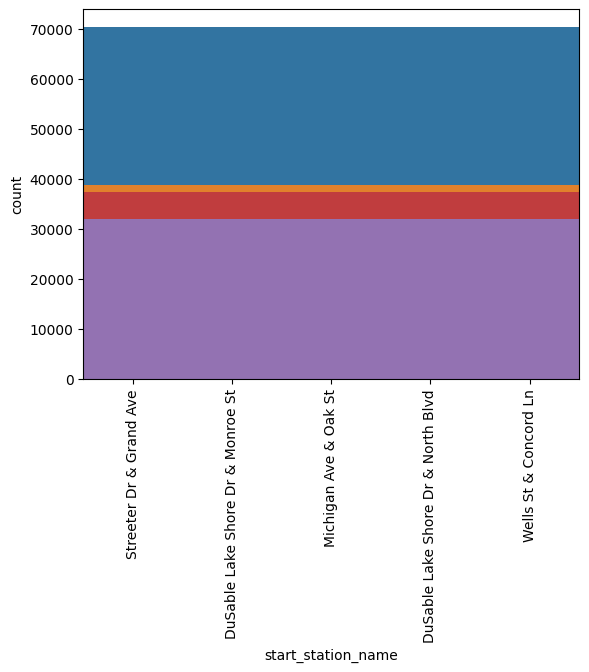

In [30]:
startcount = sns.countplot(data=all_trip_trimmed, x='start_station_name' ,order = all_trip_trimmed['start_station_name'].value_counts().iloc[:5].index)
plt.xticks(rotation = 90)
plt.show(startcount)  

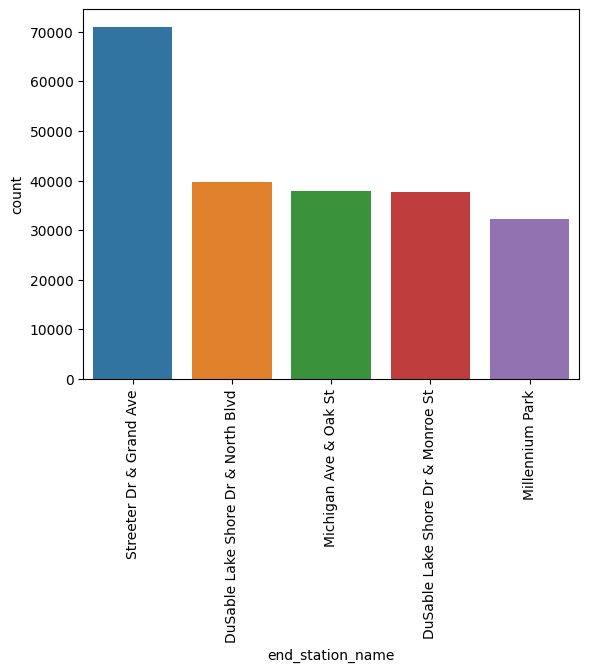

In [28]:
endcount = sns.countplot(data=all_trip_trimmed, x='end_station_name' ,order = all_trip_trimmed['end_station_name'].value_counts().iloc[:5].index)
plt.xticks(rotation = 90)  
plt.show(endcount)